# Data Augmentation과 batch_normalization을 적용한 모델

- 최종 test accuracy : 0.9085
- 소요시간 : 28s 754ms/step
- Data Augmentation 적용 사항
  - width_shift range, height_shift range
  - horizontal_flip
  - rotation_range
  - brightness_range
- BatchNormalization(momentum=0.85) 적용

In [0]:
# !kill -9 -1

In [0]:
%tensorflow_version 2.x
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import shutil
from keras.callbacks import EarlyStopping
from tensorflow.keras import models, datasets

from google.colab import drive
drive.mount('/content/drive')

TensorFlow 2.x selected.


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization
import tensorflow as tf
import zipfile

### 데이터 가져오기

In [0]:
%tensorflow_version 2.x

root_dir = '/content/drive/Shared drives/scsa_2019_a/Project/dataset.zip'
#data_dir = pathlib.Path(root_dir)
#data_dir_cwd = pathlib.Path('/content/sample_data')
# data_list = pathlib.Path('/content/drive/Shared drives/scsa_2019_a/Project/dataset_test').glob('*')
#data_list = pathlib.Path('/content/drive/Shared drives/scsa_2019_a/Project/testset/dataset_raw.zip')
zip_ref = zipfile.ZipFile(root_dir, 'r')
zip_ref.extractall("/tmp")
zip_ref.close()
#dri

In [0]:
import random

In [0]:
# !rmdir -f /tmp/tmpwpnw1k1r
data_path = '/tmp/dataset_final'

In [0]:
data_dir = pathlib.Path(data_path)

tf.io.gfile.mkdir('/test2/')
test_dir = pathlib.Path('/test2/')
image_count = len(list(data_dir.glob('*/*')))
image_count
sep_test = True
print(image_count)

7347


In [0]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != '└asdfsafdsafsaafsd'])
CLASS_NAMES
print(CLASS_NAMES)

['goeun' 'jaeseuk' 'joon' 'woosung' 'iu' 'mingi' 'bts' 'twice' 'sodam'
 'hoona' 'yuna' 'jisung' 'yoonho' 'jyp' 'hyori' 'youngae']


랜덤한 숫자 뽑기

In [0]:
if sep_test:
  for name in CLASS_NAMES:
    files = list(data_dir.glob(name + '/*'))
    randList = list(range(0, len(list(data_dir.glob(name + '/*')))))

    randList = random.sample(randList, int(len(list(data_dir.glob(name + '/*'))) * 0.2))
    print('/test2/' + name)
    tf.io.gfile.mkdir('/test2/' + name)
    print(randList)
    print(type(str(test_dir)))
    for n in randList:
      filedir = str(files[n])
      #print(name)
      
      print(str(test_dir) + '/' + name + '/' + filedir.split('/')[-1])  

      shutil.move(filedir, str(test_dir) + '/' + name + '/' + filedir.split('/')[-1])


/test2/goeun
[59, 689, 14, 854, 308, 468, 848, 571, 349, 56, 347, 564, 195, 515, 802, 688, 635, 757, 567, 588, 279, 683, 837, 877, 341, 278, 18, 305, 370, 703, 297, 69, 160, 74, 396, 864, 487, 298, 191, 670, 291, 590, 292, 685, 258, 316, 55, 505, 253, 194, 580, 166, 798, 175, 300, 384, 358, 303, 342, 31, 146, 35, 134, 353, 469, 96, 453, 702, 518, 712, 491, 769, 95, 333, 722, 506, 640, 594, 857, 481, 338, 50, 105, 879, 51, 224, 666, 541, 593, 42, 200, 667, 492, 557, 78, 832, 418, 139, 851, 115, 499, 753, 606, 244, 276, 309, 286, 171, 377, 319, 654, 533, 38, 731, 101, 682, 437, 398, 68, 454, 63, 109, 816, 737, 90, 572, 845, 206, 145, 651, 721, 765, 44, 488, 137, 274, 782, 204, 587, 449, 513, 257, 570, 269, 327, 312, 1, 455, 673, 678, 97, 542, 633, 742, 28, 659, 793, 189, 619, 853, 690, 508, 589, 855, 795, 517, 161, 591, 710, 390, 823, 669, 156, 121, 430, 431]
<class 'str'>
/test2/goeun/goeun (396).jpg
/test2/goeun/goeun (281).jpg
/test2/goeun/goeun (476).jpg
/test2/goeun/goeun (720).jpg


## 수직 수평 밝기 조정

10/10 [==============================] - 2s 153ms/step - loss: 0.9321 - acc: 0.7411

## 수직 수평 회전
oss: 0.8101 - acc: 0.7585

### image generator 만들기
- Data Augmentation 적용 사항
  - width_shift range, height_shift range
  - horizontal_flip
  - rotation_range
  - brightness_range


In [0]:

# image generator for unziped directory 
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = (
    tf.keras.preprocessing.image.ImageDataGenerator(
        width_shift_range=0.01,
        height_shift_range=0.01,
        horizontal_flip=True, 
        #vertical_flip=True,
        rotation_range=15,
        brightness_range=[0.8,1.2],
        #zoom_range=0.01,
        validation_split=0.2,
        rescale=1./255))



image_generator_cwd = (
    tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)) # preprocessing이라는 모듈 밑에 이미지를 처리하는 애들이 있고, 그 안에 있음.

image_generator_forOur = (
        tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range= 90,
        rescale=1./255)
)

In [0]:
# !cp -r /content/drive/"Shared drives"/scsa_2019_a/Project/dataset /content/sample_data

In [0]:
BATCH_SIZE = 128
IMG_HEIGHT = 128
IMG_WIDTH = 128
#STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_data_gen = image_generator.flow_from_directory(
                      directory=str(data_dir),
                      batch_size=BATCH_SIZE,
                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                      classes = list(CLASS_NAMES),
                      subset='training'
                      )

test_data_gen = image_generator.flow_from_directory(
                      directory=str(data_dir),
                      batch_size=BATCH_SIZE,
                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                      classes = list(CLASS_NAMES),
                      subset='validation'
                      )
final_gen = image_generator_cwd.flow_from_directory(
                        directory=str(test_dir),
                        batch_size=26,
                        shuffle=True,
                        target_size=(IMG_HEIGHT, IMG_WIDTH), # target_size : 이미지들의 사이즈를 조작
                        classes = list(CLASS_NAMES)
                        )


Found 4711 images belonging to 16 classes.
Found 1172 images belonging to 16 classes.
Found 1464 images belonging to 16 classes.


In [0]:
# print(class_list)

Early Stopping Preperation

In [0]:
epochs_to_wait_for_improve = 10
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=epochs_to_wait_for_improve)

모델 define 과정에서 BatchNormalization(momentum=0.85) 적용

In [0]:
bn_rate = 0.85

def model_cnn():
  model = models.Sequential()
  # conv 1
  model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
  model.add(Conv2D(64,3,padding='same',activation='relu'))
  model.add(BatchNormalization(momentum=bn_rate))
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
  
  # conv 2
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(BatchNormalization(momentum=bn_rate))
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

  # conv 3
  model.add(Conv2D(256, 3, padding='same', activation='relu'))
  model.add(Conv2D(256, 3, padding='same', activation='relu'))
  model.add(BatchNormalization(momentum=bn_rate))
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

  # conv 4
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(BatchNormalization(momentum=bn_rate))
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

  # conv 5
  model.add(Conv2D(64, 3, padding='same', activation='relu'))
  model.add(Conv2D(64, 3, padding='same', activation='relu'))
  model.add(BatchNormalization(momentum=bn_rate))
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

  # Dense layers
  model.add(Flatten(name='flatten'))
  model.add(Dense( len(list(CLASS_NAMES)), activation='softmax'))

  return model

model = model_cnn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 63, 63, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 63, 63, 128)       147584    
_________________________________________________________________
batch_normalization_6 (Batch (None, 63, 63, 128)      

In [0]:
model = models.load_model('/content/drive/My Drive/best_seynetmodel.h5')

In [0]:
epoch_n = 20

In [0]:
#len(next(test_data_gen))
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_seynetmodel.h5', monitor='val_loss', mode='min', save_best_only=True)


from keras.callbacks import EarlyStopping
epochs_to_wait_for_improve =10
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=epochs_to_wait_for_improve)

In [0]:
model_saved = True
if not model_saved:
  model.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['acc'])
  history_basic = model.fit_generator(train_data_gen, 
                          epochs=epoch_n,
                          callbacks=[early_stopping_callback, mc],
                          validation_data=test_data_gen)

In [0]:
print('hello2')

hello2


In [0]:
print('hello2')

hello2


In [0]:
print('hello')

hello


In [0]:
if not model_saved:
  model = tf.keras.models.load_model('/content/best_seynetmodel.h5')
  shutil.move('/content/best_seynetmodel.h5', '/content/drive/My Drive/best_seynetmodel.h5')
else :
  model = tf.keras.models.load_model('/content/drive/My Drive/best_seynetmodel.h5')

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 63, 63, 128)       5

## Evaluate

In [0]:
if not model_saved:
  loss = history_basic.history['loss']
  epochs = range(1, len(loss)+1)

  plt.title('Loss')
  plt.plot(epochs, history_basic.history['loss'], 'b', label='train_loss')
  plt.plot(epochs, history_basic.history['val_loss'], 'g', label='val_loss')
  #plt.ylim([0,0.5])
  plt.grid(True)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='best')
  plt.show()

In [0]:
model.evaluate_generator(final_gen, verbose=2)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
57/57 - 5s - loss: 0.2009 - acc: 0.9440


[0.2009108944126127, 0.9439891]

In [0]:
test_accuracy = model.evaluate_generator(final_gen, verbose=1)

  ...
    to  
  ['...']
57/57 [==============================] - 1s 19ms/step - loss: 0.3282 - acc: 0.9085


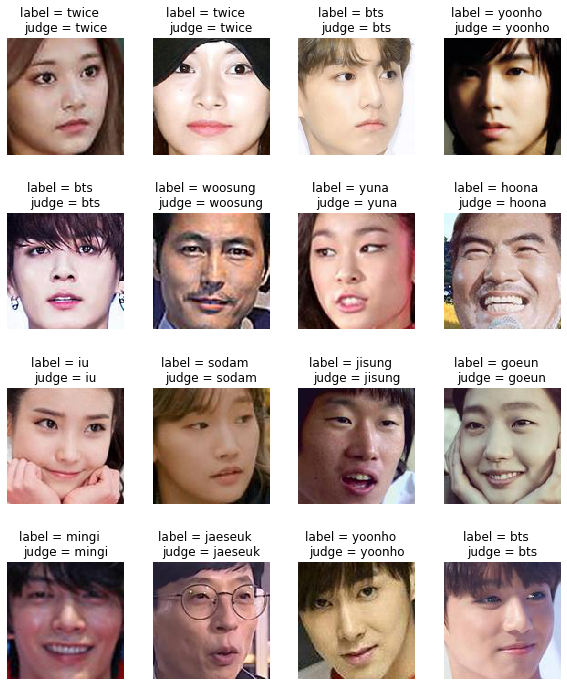

In [0]:
def show_batch(data_gen, class_l):
  # get image and label from data generator
  img_batch, l_batch = next(data_gen) 
  plt.figure(figsize=(10,10))
  ret = []
  img_title = model.predict(img_batch)
  for img in img_title:
    ret.append(np.array(img).argmax())
  for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.5, wspace=0.2)
    plt.imshow(img_batch[n])
    title_name = 'label = ' + class_l[l_batch[n]==1][0] + "   \n" + "judge = " + CLASS_NAMES[ret[n]]
    plt.title(title_name)
    plt.axis('off')

show_batch(final_gen, CLASS_NAMES)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
test_data_gen = image_generator_cwd.flow_from_directory(
                        directory=str(test_dir),
                        batch_size=BATCH_SIZE,
                        shuffle=False,
                        target_size=(IMG_HEIGHT, IMG_WIDTH), # target_size : 이미지들의 사이즈를 조작
                        classes = list(CLASS_NAMES)
                        )

Y_pred = model.predict_generator(test_data_gen, 2210 // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_data_gen.classes, y_pred))

Found 1464 images belonging to 16 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[151   0   0   0  11   0   0   2   8   0   2   0   0   1   0   1]
 [  0  98   0   1   0   1   0   0   0   1   0   0   1   1   0   0]
 [  0   0  24   0   0   2   0   0   1   1   0   0   0   2   0   1]
 [  0   0   0  80   0   0   1   0   0   1   0   0   3   0   1   0]
 [  0   1   0   0 158   0   0   5   5   0   1   0   1   0   1   2]
 [  0   0   0   0   1 101   4   0   3   0   0   0   3   0   1   0]
 [  1   0   0   0   1   2 115   1   5   0   1   0   2   0   0   0]
 [  0   0   0   0   0   0   0 164   0   0   0   0   0   0   0   1]
 [  1   0   0   0   1   1   0   1 126   0   1   0   0   0   0   1]
 [  0   0   2   0   0   0   0   0   0  28   0   0   0   1   0   0]
 [  0   0   0   0   1   1   0   4   1   0  79   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   1  23   1   1   0   0]
 [  0   0   0   2   0   1   1   0   0   1   0   0  43   

In [0]:
CLASS_NAMES

array(['goeun', 'jaeseuk', 'joon', 'woosung', 'iu', 'mingi', 'bts',
       'twice', 'sodam', 'hoona', 'yuna', 'jisung', 'yoonho', 'jyp',
       'hyori', 'youngae'], dtype='<U7')

In [0]:
print('Classification Report')
print(classification_report(test_data_gen.classes, y_pred, target_names=CLASS_NAMES))

Classification Report
              precision    recall  f1-score   support

       goeun       0.99      0.86      0.92       176
     jaeseuk       0.99      0.95      0.97       103
        joon       0.86      0.77      0.81        31
     woosung       0.96      0.93      0.95        86
          iu       0.89      0.91      0.90       174
       mingi       0.93      0.89      0.91       113
         bts       0.94      0.90      0.92       128
       twice       0.89      0.99      0.94       165
       sodam       0.83      0.95      0.89       132
       hoona       0.82      0.90      0.86        31
        yuna       0.89      0.91      0.90        87
      jisung       0.96      0.82      0.88        28
      yoonho       0.80      0.90      0.84        48
         jyp       0.89      0.93      0.91        54
       hyori       0.95      0.84      0.89        70
     youngae       0.82      0.82      0.82        38

    accuracy                           0.91      1464
   m

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1
2
3
4
5
6
7
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8
9
10
11
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
12
13
14
15
16
17
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
18
19
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
20
21
22
23
24
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
25
26
27
28
29
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
30
31
32
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
33
34
35
36


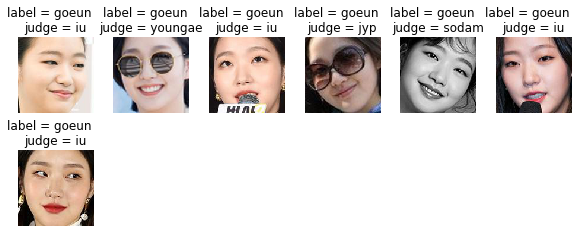

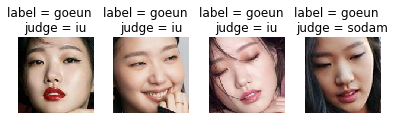

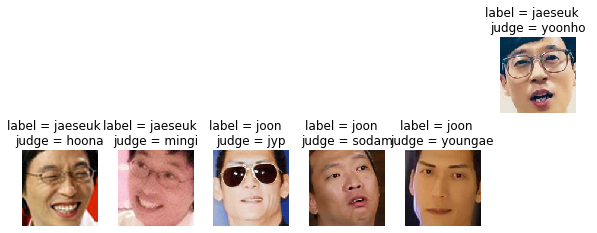

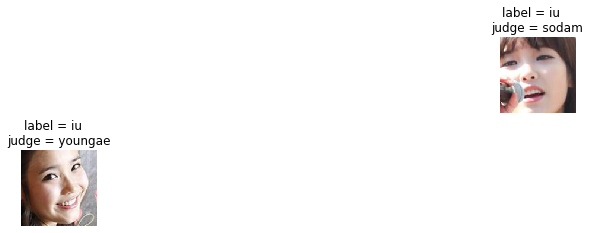

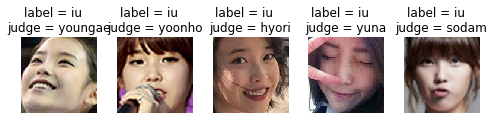

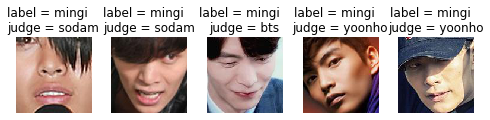

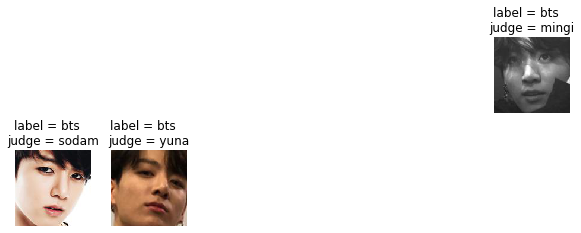

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

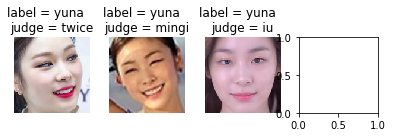

In [0]:
def show_batch_wrong(data_gen, class_l):
  # get image and label from data generator
  i = 1
  for img_batch, l_batch in data_gen:
    if i > 36: break
    plt.figure(figsize=(10,10))
    ret = []
    img_title = model.predict(img_batch)
    print(l_batch[1])
    #if l_batch[n]==1][0] != 'hyori': continue
    for img in img_title:
      ret.append(np.array(img).argmax())
  
    for n in range(36):
      if class_l[l_batch[n]==1][0] == CLASS_NAMES[ret[n]]: continue
      plt.subplot(6, 6, i)
      print(i)
      i+=1
      if i > 36: break
      plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.5, wspace=0.2)
      plt.imshow(img_batch[n])
      title_name = 'label = ' + class_l[l_batch[n]==1][0] + "   \n" + "judge = " + CLASS_NAMES[ret[n]]
      plt.title(title_name)
      plt.axis('off')

show_batch_wrong(test_data_gen, CLASS_NAMES)

# 히트맵 함수 가져오기

In [0]:
# tf.keras.models.Model -> functional model
grad_model = tf.keras.models.Model(
    [model.inputs],                           # input: model inputs
    [model.get_layer('conv2d_9').output,  # outputs: model last conv
     model.get_layer('flatten').output]                            # softmax out
)

In [0]:
import cv2

def getHeatMap(img) :
  # GradientTape 설정
  img2 = img
  img = np.expand_dims(img, axis=0) 
  with tf.GradientTape() as tape:
    conv_outputs, predict = grad_model(img)   # feature, predict
    class_out = predict[:, np.argmax(predict[0])]    # class     
  output = conv_outputs[0]
  # Get gradient for input image
  grads = tape.gradient(class_out, conv_outputs)[0]
  
  # Average gradients spatially
  weights = tf.reduce_mean(grads, axis=(0, 1))
  # Build a map of filters according to gradients importance
  cam = np.ones(output.shape[0:2], dtype=np.float32)
  for index, w in enumerate(weights):
    cam += w * output[:, :, index]
 
  # GBR -> RGB
  #img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2는 기본적으로 image를 GBR로 처리

  # resize cam
  cam = cv2.resize(cam.numpy(), (img2.shape[1], img2.shape[0]))
  cam = np.maximum(cam, 0)          # 0 이상의 값만 취함
  # heatmap : minmax normalized one

  heatmap = (cam - cam.min()) / (cam.max() - cam.min())

  # convert heatmap to rgb
  heatmap = np.uint8(255 * heatmap)                       # RGB range (0~255)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # apply color map
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)      # colormap to RGB
  return heatmap

<generator object Path.glob at 0x7f732043a7d8>
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


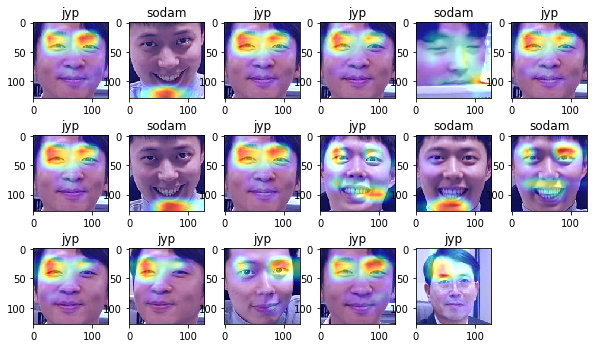

In [0]:
from tensorflow.keras.preprocessing import image
# load the image with the required shape
data_list = pathlib.Path('/content/drive/Shared drives/scsa_2019_a/9_smc/checkData/hoona/training').glob('*')
print(data_list)
#img = image.load_img('/content/drive/Shared drives/scsa_2019_a/9_smc/checkData/hoona/20191218_081222.jpg', target_size=(IMG_HEIGHT, IMG_WIDTH))
plt.figure(figsize=(10,10))
i = 1
j = 0
for data in data_list:
  j+=1
  if i > 36: break
  print(i)
  img = image.load_img(str(data), target_size=(128, 128))

  imgarr = image.img_to_array(img)

  pred = model.predict(np.expand_dims(imgarr, axis=0))
  pred = np.argmax(pred)
  plt.subplot(6, 6, i)
  plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.5, wspace=0.2)


  heatmap_img = getHeatMap(imgarr)

  output_image = cv2.addWeighted((imgarr).astype('uint8'), 1, heatmap_img, 0.5, 0)   
  plt.imshow(output_image)
  plt.title(CLASS_NAMES[pred])
  i+=1
# img = img.rotate(270)
# # check image
# plt.imshow(img)
# # convert the image to an array
# img = image.img_to_array(img)         # tf.keras.processing
# # expand dimensions so that it represents a single 'sample'
# img = np.expand_dims(img, axis=0)     # numpy
# # prepare the image (e.g. scale pixel values for the vgg)

## 사전 테스트를 위해 임의로 작성한 코드

In [0]:
suji = image.load_img('/content/drive/Shared drives/scsa_2019_a/9_smc/checkData/youngae/suji3.jpg', target_size=(128, 128))
imgarr = image.img_to_array(img)
imgarr = np.expand_dims(imgarr, axis=0)
pred = model.predict(imgarr)
print(np.argmax(pred))
print(pred)
print(CLASS_NAMES[7])

1
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 3.2632127e-38 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
jaeseuk


해당 generator를 예측하는 코드를 작성한다.

In [0]:
pred = model.predict(img)

In [0]:
pred = np.argmax(pred)
print(CLASS_NAMES[pred])

jaeseuk


In [0]:
for data in data_list:
  plt.figure(figsize=(10,10))
  ret = []
  img_title = model.predict(img_batch)
  print(l_batch[1])
  #if l_batch[n]==1][0] != 'hyori': continue
  for img in img_title:
    ret.append(np.array(img).argmax())
  #print(ret)
  for n in range(36):
    plt.subplot(4, 4, n+1)
    plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.5, wspace=0.2)
    plt.imshow(img_batch[n])
    title_name = "judge = " + CLASS_NAMES[ret[n]]
    plt.title(title_name)
    plt.axis('off')

In [0]:
show_

cp: invalid option -- 'm'
Try 'cp --help' for more information.


In [0]:
!ls -al /content/drive/Shared\ drives/scsa_2019_a/9_smc/checkData

total 4
drwx------ 2 root root 4096 Dec 18 00:20 hoona


In [0]:
print(next(out))

NameError: ignored

In [0]:
!cp /content/best_model.h5 /content/drive/Shared drives/scsa_2019_a/9_smc/seynetModel.h5

cp: target 'drives/scsa_2019_a/9_smc/seynetModel.h5' is not a directory


# 자르기


In [0]:
from googleapiclient import  discovery
from oauth2client.client  import GoogleCredentials
import sys
import io
import base64
from PIL import Image
from PIL import ImageDraw
from genericpath import isfile
import os
import hashlib
from oauth2client.service_account import ServiceAccountCredentials

NUM_THREADS = 10
MAX_FACE = 1
MAX_LABEL = 1
IMAGE_SIZE = 128,128
MAX_ROLL = 30
MAX_TILT = 30
MAX_PAN = 30

# index to transfrom image string label to number
global_label_index = 16
global_label_number = [0 for x in range(2000)]
global_image_hash = []

class FaceDetector():
    def __init__(self):
        # initialize library
        #credentials = GoogleCredentials.get_application_default()
        scopes = ['https://www.googleapis.com/auth/cloud-platform']
        credentials = ServiceAccountCredentials.from_json_keyfile_name(
                        '/content/drive/Shared drives/scsa_2019_a/2_yke/facedetect-6ce8a6cec037.json', scopes=scopes)
        self.service = discovery.build('vision', 'v1', credentials=credentials)
        print ("Getting vision API client : %s" ,self.service)

    #def extract_face(selfself,image_file,output_file):
    def skew_angle(self):
        return None
    
    def detect_face(self,image_file):
        try:
            with io.open(image_file,'rb') as fd:
                image = fd.read()
                batch_request = [{
                        'image':{
                            'content':base64.b64encode(image).decode('utf-8')
                            },
                        'features':[
                            {
                            'type':'FACE_DETECTION',
                            'maxResults':MAX_FACE,
                            },
                            {
                            'type':'LABEL_DETECTION',
                            'maxResults':MAX_LABEL,
                            }
                                    ]
                        }]
                fd.close()
        
            request = self.service.images().annotate(body={
                            'requests':batch_request, })
            response = request.execute()
            if 'faceAnnotations' not in response['responses'][0]:
                 print('[Error] %s: Cannot find face ' % image_file)
                 return None
                
            face = response['responses'][0]['faceAnnotations']
            label = response['responses'][0]['labelAnnotations']
            
            if len(face) > 1 :
                print('[Error] %s: It has more than 2 faces in a file' % image_file)
                return None
            
            roll_angle = face[0]['rollAngle']
            pan_angle = face[0]['panAngle']
            tilt_angle = face[0]['tiltAngle']
            angle = [roll_angle,pan_angle,tilt_angle]
            
            # check angle
            # if face skew angle is greater than > 20, it will skip the data
            if abs(roll_angle) > MAX_ROLL or abs(pan_angle) > MAX_PAN or abs(tilt_angle) > MAX_TILT:
                print('[Error] %s: face skew angle is big' % image_file)
                return None
            
            # check sunglasses
            for l in label:
                if 'sunglasses' in l['description']:
                  print('[Error] %s: sunglass is detected' % image_file)  
                  return None
            
            box = face[0]['fdBoundingPoly']['vertices']
            left = box[0]['x']
            top = box[1]['y']
                
            right = box[2]['x']
            bottom = box[2]['y']
                
            rect = [left,top,right,bottom]
                
            print("[Info] %s: Find face from in position %s and skew angle %s" % (image_file,rect,angle))
            return rect
        except Exception as e:
            print('[Error] %s: cannot process file : %s' %(image_file,str(e)) )
            
    def rect_face(self,image_file,rect,outputfile):
        try:
            fd = io.open(image_file,'rb')
            image = Image.open(fd)
            draw = ImageDraw.Draw(image)
            draw.rectangle(rect,fill=None,outline="green")
            image.save(outputfile)
            fd.close()
            print('[Info] %s: Mark face with Rect %s and write it to file : %s' %(image_file,rect,outputfile) )
        except Exception as e:
            print('[Error] %s: Rect image writing error : %s' %(image_file,str(e)) )
        
    def crop_face(self,image_file,rect,outputfile):
        
        global global_image_hash
        try:
            fd = io.open(image_file,'rb')
            image = Image.open(fd)  

            # extract hash from image to check duplicated image
            m = hashlib.md5()
            with io.BytesIO() as memf:
                image.save(memf, 'PNG')
                data = memf.getvalue()
                m.update(data)
            image_hash = m.hexdigest()
            
            if image_hash in global_image_hash:
                print('[Error] %s: Duplicated image' %(image_file) )
                return None
            global_image_hash.append(image_hash)

            crop = image.crop(rect)
            im = crop.resize(IMAGE_SIZE,Image.ANTIALIAS)
            
            
            im.save(outputfile,"JPEG")
            fd.close()
            print('[Info]  %s: Crop face %s and write it to file : %s' %( image_file,rect,outputfile) )
            return True
        except Exception as e:
            print('[Error] %s: Crop image writing error : %s' %(image_file,str(e)) )
        
    def getfiles(self,src_dir):
        files = []
        for f in os.listdir(src_dir):
            if isfile(os.path.join(src_dir,f)):
                if not f.startswith('.'):
                 files.append(os.path.join(src_dir,f))

        return files
    
    # read files in src_dir and generate image that rectangle in face and write into files in des_dir
    def rect_faces_dir(self,src_dir,des_dir):
        if not os.path.exists(des_dir):
            os.makedirs(des_dir)
            
        files = self.getfiles(src_dir)
        for f in files:
            des_file = os.path.join(des_dir,os.path.basename(f))
            rect = self.detect_face(f)
            if rect != None:
                self.rect_face(f, rect, des_file)
    
    # read files in src_dir and crop face only and write it into des_dir
    def crop_faces_dir(self,src_dir,des_dir,maxnum):
        
        # training data will be written in $des_dir/training
        # validation data will be written in $des_dir/validate
        
        des_dir_training = os.path.join(des_dir,'training')
        des_dir_validate = os.path.join(des_dir,'validate')
        
        if not os.path.exists(des_dir):
            os.makedirs(des_dir)
        if not os.path.exists(des_dir_training):
            os.makedirs(des_dir_training)
        if not os.path.exists(des_dir_validate):
            os.makedirs(des_dir_validate)
        
        path,folder_name = os.path.split(src_dir)
        label = folder_name
        
        # create label file. it will contains file location 
        # and label for each file
        training_file = open(des_dir+'/training_file.txt','a')
        validate_file = open(des_dir+'/validate_file.txt','a')
        
        files = self.getfiles(src_dir)
        global global_label_index
        cnt = 0 
        num = 0 # number of training data
        for f in files:
            rect = self.detect_face(f)

            # replace ',' in file name to '.'
            # because ',' is used for deliminator of image file name and its label
            des_file_name = os.path.basename(f)
            des_file_name = des_file_name.replace(',','_')
            
            if rect != None:
                # 70% of file will be stored in training data directory
                if(cnt < 8):
                    des_file = os.path.join(des_dir_training,des_file_name)
                    # if we already have duplicated image, crop_face will return None
                    if self.crop_face(f, rect, des_file ) != None:
                        training_file.write("%s,%s,%d\n"%(des_file,label,global_label_index) )
                        num = num + 1
                        global_label_number[global_label_index] = num
                        cnt = cnt+1

                    if (num>=maxnum):
                        break
                # 30% of files will be stored in validation data directory
                else: # for validation data
                    des_file = os.path.join(des_dir_validate,des_file_name)
                    if self.crop_face(f, rect, des_file) != None:
                        validate_file.write("%s,%s,%d\n"%(des_file,label,global_label_index) )
                        cnt = cnt+1
                    
                if(cnt>9): 
                    cnt = 0
        #increase index for image label
        
        global_label_index = global_label_index + 1 
        print('## label %s has %s of training data' %(global_label_index,num))
        training_file.close()
        validate_file.close()
        
    def getdirs(self,dir):
        dirs = []
        for f in os.listdir(dir):
            f=os.path.join(dir,f)
            if os.path.isdir(f):
                if not f.startswith('.'):
                    dirs.append(f)

        return dirs
        
    def crop_faces_rootdir(self,src_dir,des_dir,maxnum):
        # crop file from sub-directoris in src_dir
        dirs = self.getdirs(src_dir)
        
        #list sub directory
        for d in dirs:
            print('[INFO] : ### Starting cropping in directory %s ###'%d)
            self.crop_faces_dir(d, des_dir,maxnum)
        #loop and run face crop
        global global_label_number
        print("number of datas per label ", global_label_number)

#usage
# arg[1] : src directory
# arg[2] : destination diectory
# arg[3] : max number of samples per class        
def main():
    srcdir= '/content/drive/Shared drives/scsa_2019_a/9_smc/checkData/youngae'
    desdir = '/content/drive/Shared drives/scsa_2019_a/9_smc/checkData/hoona'
    maxnum = 1000
    
    detector = FaceDetector()

    inputfile = srcdir
    outputfile = desdir
    detector.crop_faces_rootdir(srcdir, desdir,maxnum)
    detector.crop_faces_dir(inputfile,outputfile, maxnum)
    # rect = detector.detect_face(inputfile)
    # detector.rect_image(inputfile, rect, outputfile)
    # detector.crop_face(inputfile, rect, outputfile)
    
if __name__ == "__main__":
    main()

Getting vision API client : %s <googleapiclient.discovery.Resource object at 0x7f848ed92550>
number of datas per label  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# 히트맵 함수들

In [0]:
img_path = '/content/drive/Shared drives/scsa_2019_a/9_smc/checkData/hoona/training/20191218_145922_010.jpg'

In [0]:
# load the image with the required shape
img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
getHeatMap(img)
# check image

# convert the image to an array
img = image.img_to_array(img)         # tf.keras.processing
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)     # numpy
img = img / 255
# # prepare the image (e.g. scale pixel values for the vgg)
# img = vgg16.preprocess_input(img)     # VGG16.preprocess_input


ValueError: ignored

In [0]:
# tf.keras.models.Model -> functional model
grad_model = tf.keras.models.Model(
    [model.inputs],                           # input: model inputs
    [model.get_layer('conv2d_9').output,  # outputs: model last conv
     model.get_layer('flatten').output]                            # softmax out
)

In [0]:
# GradientTape 설정
with tf.GradientTape() as tape:
    conv_outputs, predict =grad_model(img)   # feature, predict
    class_out = predict[:, np.argmax(predict[0])]    # class     
#print(class_out)
#print(predict)
# feature map
output = conv_outputs[0]

# Get gradient for input image
grads = tape.gradient(class_out, conv_outputs)[0]

# check grads' shape
grads.shape, output.shape

(TensorShape([7, 7, 64]), TensorShape([7, 7, 64]))

In [0]:
# Average gradients spatially

weights = tf.reduce_mean(grads, axis=(0, 1))

# Build a map of filters according to gradients importance
cam = np.ones(output.shape[0:2], dtype=np.float32)
#print(cam)
#print(weights)
#print(grads)
for index, w in enumerate(weights):
    cam += w * output[:, :, index]

# check cam shape
cam.shape, weights.shape

(TensorShape([7, 7]), TensorShape([64]))

In [0]:
import cv2

# image read: ndarray type

img = cv2.imread(img_path)
# img2 = image.load_img(img_path)
# img2 = image.img_to_array(img2)


# img2 = np.expand_dims(img2, axis=0) 

# img2 = img2/255.0
# GBR -> RGB

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2는 기본적으로 image를 GBR로 처리
plt.imshow(CLASS_NAMES[model.predict_classes(img)])

img.shape, type(img)

ValueError: ignored

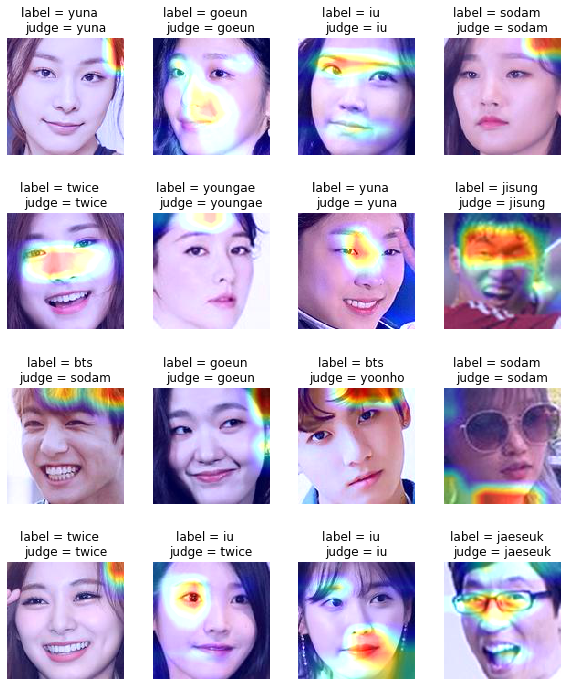

In [0]:
def show_heat(data_gen, class_l):
  # get image and label from data generator
  img_batch, l_batch = next(data_gen) 
  plt.figure(figsize=(10,10))
  ret = []
  img_title = model.predict(img_batch)
  for img in img_title:
    ret.append(np.array(img).argmax())
  for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.5, wspace=0.2)
    heatmap = getHeatMap(img_batch[n])
    #plt.imshow(heatmap)
    #img_tmp = cv2.cvtColor(img_batch[n], cv2.COLOR_BGR2RGB)
    output_image = cv2.addWeighted((img_batch[n]*255).astype('uint8'), 1, heatmap, 0.5, 0)                              
    #plt.imshow(img_batch[n].astype('uint8'))

    plt.imshow(output_image)
    #plt.imshow(heatmap)
    
    title_name = 'label = ' + class_l[l_batch[n]==1][0] + "   \n" + "judge = " + CLASS_NAMES[ret[n]]
    plt.title(title_name)
    plt.axis('off')

show_heat(final_gen, CLASS_NAMES)